<a href="https://colab.research.google.com/github/vibhav-pvk/creditcard-fraud-detection-ML/blob/master/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded =  files.upload()

In [5]:
#using pandas to load dataset from csv file
import pandas as pd

In [6]:
data = pd.read_csv('creditcard.csv')

##STEP 1 & 2: Data cleaning & data preprocessing

Explore, visualize/organize and clean the dataset

In [9]:
print(data.columns)
print(data.shape)

#class = 1 implies fradulent transaction
#class = 0 implies valid transaction

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(121551, 31)


In [11]:
data = data.sample(frac = 0.1, random_state = 1)
print(data.shape)

(12155, 31)


In [12]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
92862,64142,0.495451,-1.176728,-0.906776,0.334327,-0.336883,-0.962034,1.063054,-0.520149,-0.265802,-0.307902,-0.564925,0.365823,0.844908,0.418249,0.778267,0.080056,-0.363800,-0.519715,0.159657,0.890330,0.197329,-0.385989,-0.548869,0.008649,0.475299,1.051770,-0.194251,0.065003,453.72,0.0
35857,38296,-0.338796,0.219012,0.847169,-1.398254,-0.466883,-0.389518,0.600295,-0.204246,-1.318693,0.325762,-1.571992,-1.253916,-0.474211,0.147775,0.773289,-1.159812,-0.272598,1.437741,-0.254851,-0.459419,-0.336475,-0.573714,-0.139067,-0.450073,-0.313611,1.012205,-0.055937,0.085562,79.90,0.0
17651,28840,-1.091144,0.022061,0.060928,-1.150355,0.461584,0.594168,-0.293088,0.565389,-1.921841,0.626968,0.176078,-0.081953,1.166132,0.246278,0.572309,1.093820,0.188962,-1.064288,2.448004,0.442016,-0.167276,-0.756499,-0.048054,-1.713571,-0.394201,-0.452330,0.163050,0.073658,62.80,0.0
39656,39915,-1.831995,0.060769,0.467363,-0.781855,0.184862,-0.757508,1.016760,0.229102,-1.194521,-0.881071,1.751884,1.569240,0.991436,0.660441,-0.412783,0.161695,-0.236644,-0.996148,-0.421391,-0.046043,-0.098140,-0.653055,0.072480,0.287652,-0.440052,0.501993,-0.153515,-0.086436,170.00,0.0
77317,56994,-0.961267,0.685839,1.577215,-2.112261,-0.532196,-0.729632,0.038991,0.524754,0.711548,-2.056868,-0.311243,0.546280,-0.126692,0.350192,1.458992,-0.103752,-0.236489,-0.167904,-0.753183,-0.284728,0.058324,0.049372,-0.189649,0.054025,0.500913,-0.897574,-0.090690,-0.086851,4.69,0.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12155 entries, 92862 to 33412
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    12155 non-null  int64  
 1   V1      12155 non-null  float64
 2   V2      12155 non-null  float64
 3   V3      12155 non-null  float64
 4   V4      12155 non-null  float64
 5   V5      12155 non-null  float64
 6   V6      12155 non-null  float64
 7   V7      12155 non-null  float64
 8   V8      12155 non-null  float64
 9   V9      12155 non-null  float64
 10  V10     12155 non-null  float64
 11  V11     12155 non-null  float64
 12  V12     12155 non-null  float64
 13  V13     12155 non-null  float64
 14  V14     12155 non-null  float64
 15  V15     12155 non-null  float64
 16  V16     12155 non-null  float64
 17  V17     12155 non-null  float64
 18  V18     12155 non-null  float64
 19  V19     12155 non-null  float64
 20  V20     12155 non-null  float64
 21  V21     12155 non-null  float64

In [18]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000,12155.000000
mean,47469.836857,-0.268581,-0.023377,0.675211,0.169720,-0.278986,0.079227,-0.119712,0.060304,-0.073152,-0.006608,0.222516,-0.020488,-0.013886,0.026015,0.204707,-0.011998,0.043897,-0.086445,-0.015441,0.048117,-0.023177,-0.115250,-0.028369,0.009875,0.135883,0.026232,0.003075,0.000897,95.018716,0.002304
std,19228.377982,1.883364,1.733838,1.291780,1.348154,1.371493,1.323549,1.240084,1.272501,1.115223,1.108529,1.060144,1.070018,1.015323,0.960161,0.928829,0.902028,0.947360,0.844645,0.814656,0.768623,0.817433,0.653865,0.675841,0.595754,0.437010,0.489877,0.394573,0.313496,247.218262,0.047942
min,0.000000,-28.344757,-40.978852,-28.923756,-4.759357,-20.346228,-17.574835,-19.210896,-37.353443,-7.570322,-13.386683,-2.835059,-17.131301,-3.604137,-18.049998,-3.625016,-12.391346,-22.608868,-9.498746,-4.021062,-10.069499,-12.820166,-8.887017,-25.356744,-2.761047,-6.035054,-1.476146,-7.463188,-8.478686,0.000000,0.000000
25%,35692.000000,-1.008240,-0.595452,0.174985,-0.700950,-0.911102,-0.658585,-0.601490,-0.134203,-0.704254,-0.474509,-0.546684,-0.427385,-0.691645,-0.345333,-0.342678,-0.488996,-0.397961,-0.564051,-0.508243,-0.168692,-0.225764,-0.544114,-0.175250,-0.329083,-0.131326,-0.322237,-0.061821,-0.004734,6.990000,0.000000
50%,49144.000000,-0.260929,0.093576,0.756604,0.203483,-0.323480,-0.162757,-0.059591,0.080010,-0.135783,-0.089072,0.137871,0.130545,-0.017034,0.057879,0.317077,0.077076,-0.016724,-0.082466,-0.022823,-0.021697,-0.055749,-0.088627,-0.050210,0.069697,0.169378,-0.065443,0.011714,0.023361,25.900000,0.000000
75%,63211.500000,1.156338,0.743194,1.368571,1.029623,0.242805,0.484005,0.411171,0.375220,0.496915,0.453874,1.044803,0.635169,0.657783,0.460495,0.879646,0.538227,0.439584,0.387935,0.484739,0.171537,0.118503,0.310457,0.080132,0.408983,0.422815,0.288996,0.085740,0.078352,85.680000,0.000000
max,76233.000000,1.613335,15.598193,4.226108,11.927512,24.363532,13.026747,21.246173,18.329406,10.313974,12.660426,11.228470,3.607076,3.685570,6.441021,4.279110,3.673225,7.454785,3.458055,3.809136,16.178535,27.202839,4.359627,17.297845,4.016342,2.732898,3.040808,5.052705,6.711628,6950.510000,1.000000


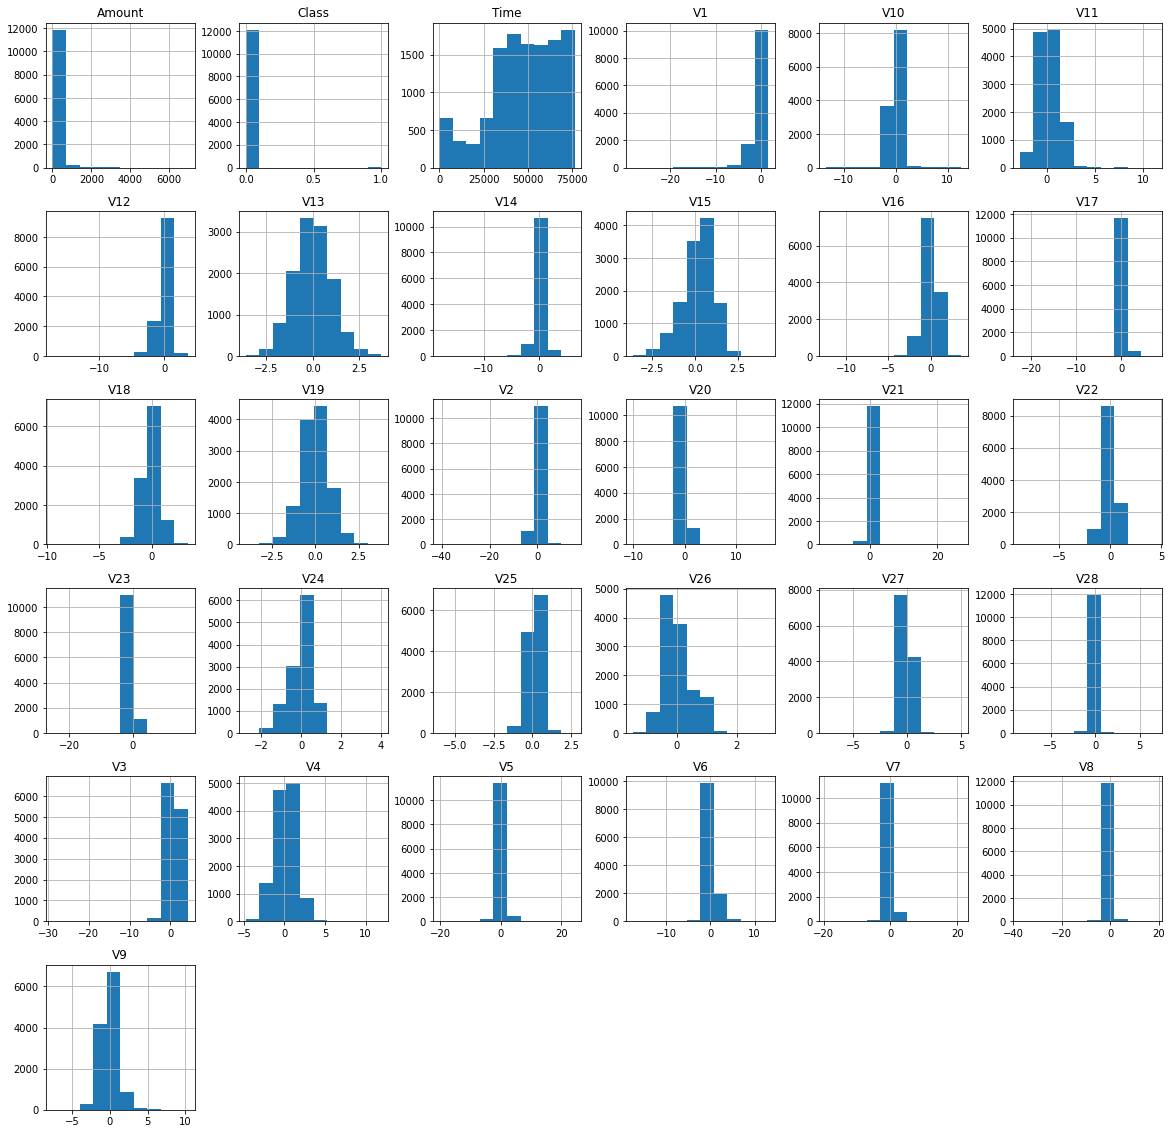

In [17]:
data.hist(figsize = (20, 20))

import matplotlib.pyplot as plt
plt.show()

In [15]:
data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
92862,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35857,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17651,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39656,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
77317,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55636,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
84044,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98201,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
82101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No NULL values present

In [22]:
#determining frad cases in our considered dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

fraction = float(len(fraud)) / float(len(valid))
print(fraction)

print('Fraud cases: {}'.format(len(fraud)))
print('Valid cases: {}'.format(len(valid)))

0.002308897501443061
Fraud cases: 28
Valid cases: 12127


##STEP 3, 4 & 5: Filter, evaluate and build the model

In [23]:
columns = data.columns.tolist() #get all columns form dataframe

columns = [c for c in columns if c not in ["Class"]] #filter the columns to get only the data we require

target = "Class" #since we predict on based on Class

X = data[columns]
Y = data[target]

print(X.shape)
print(Y.shape)

(12155, 30)
(12155,)


In [35]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

state = 1

classifiers = {
    "Isolation forest": IsolationForest(max_samples=len(X),
                                        contamination = fraction,
                                        random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors = 20,
        contamination = fraction)
}

In [38]:
n_outliers = len(fraud)

for i, (clf_name,clf) in enumerate(classifiers.items()):
  if clf_name == "Local Outlier Factor":
    y_pred = clf.fit_predict(X)
    score_pred = clf.negative_outlier_factor_
  else:
    clf.fit(X)
    scores_pred = clf.decision_function(X)
    y_pred = clf.predict(X)

  y_pred[y_pred == 1] = 0
  y_pred[y_pred == -1] = 1

  n_errors = (y_pred != Y).sum()

# Final step: Analysis outcome

In [39]:
  print('{}: {}'.format(clf_name,n_errors))
  print(accuracy_score(Y, y_pred))
  print(classification_report(Y, y_pred))

Local Outlier Factor: 55
0.995475113122172
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12127
         1.0       0.03      0.04      0.04        28

    accuracy                           1.00     12155
   macro avg       0.52      0.52      0.52     12155
weighted avg       1.00      1.00      1.00     12155

